In [27]:
import geopandas as gpd
import numpy as np
import fiona
import pandas as pd
import matplotlib
import PIL 
import os

shapefile = gpd.read_file("not.shp")
print(PIL.__file__)

C:\Users\csana\Anaconda3\lib\site-packages\PIL\__init__.py


In [28]:
shapefile = shapefile.query('NMUN=="Valencia"')

In [29]:
df = pd.read_csv(
    "Income_per_secciones.csv", delimiter=";", header=None,
    names=["CUSEC","income"], usecols=["CUSEC","income"],encoding = "ISO-8859-1");
df

,CUSEC,income
0,4625001001,14918
1,4625001002,16769
2,4625001003,16668
3,4625001005,17188
4,4625001007,21888
...,...,...
591,4625019012,8931
592,4625019013,9306
593,4625019014,8591
594,4625019015,9883


In [30]:
shapefile.CUSEC = shapefile.CUSEC.astype(np.int64)
df.CUSEC.astype(np.int64)
shapefile = shapefile.merge(df, on='CUSEC')

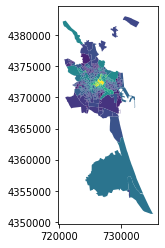

In [31]:
shapefile.plot(column='income')

In [32]:
df = pd.read_csv('../Grades/dataSet.csv')

In [39]:
i=0
while i < 3:#len(df):
    j=0
    while j<3:#len(shapefile):
        print(shapefile.loc[j,"geometry"])
    
        j=j+1
    i=i+1

#for school in df.iterrows():
#    for c in shapefile.iterrows():
#        school.CUSEC = c.CUSEC
#        break
#        if c.geometry.contains(school.coordinate):
#            print(c.CUSEC)
#            break;

POLYGON ((725962.3710000003 4372999.2315, 725961.8344999999 4372997.595000001, 725958.2708999999 4372986.271600001, 725956.9643999999 4372984.031099999, 725945.8022999996 4372965.912799999, 725939.8507000003 4372938.960999999, 725936.6925999997 4372924.0846, 725918.0477 4372932.5551, 725920.0876000002 4372924.611199999, 725919.6084000003 4372896.561799999, 725919.1368000004 4372875.278999999, 725914.7257000003 4372857.7751, 725911.4365999997 4372844.7292, 725917.5436000004 4372841.053200001, 725903.4205 4372824.110300001, 725892.2670999998 4372829.0418, 725889.4000000004 4372820.962400001, 725885.2259999998 4372808.623500001, 725870.6727999998 4372779.0097, 725863.0702 4372763.461300001, 725859.7976000002 4372741.9615, 725858.9866000004 4372739.385, 725855.648 4372728.8116, 725853.2644999996 4372721.244100001, 725849.5985000003 4372716.5277, 725844.7894000001 4372710.918199999, 725841.9798999997 4372700.715299999, 725834.6721999999 4372675.670499999, 725838.4776999997 4372669.639, 7258

In [23]:
df


,Unnamed: 0,Instituto,Localidad,Presentados,Aptos,Media Expediente,Media PAU,coordinate,NumBib,NumBib 2 km,NumBib 5 km,NumBib 8 km,NumBib 10 km
0,0,CENTRE PRIVAT LA PURÍSIMA,ALZIRA,34,34,7.9,6.6,"[39.153307, -0.4422964]",3,0,3,7,7
1,1,IES REI EN JAUME,ALZIRA,59,56,7.6,6.2,"[39.146734, -0.4306395]",1,0,1,5,7
2,2,IES JOSÉ MARÍA PARRA,ALZIRA,39,36,7.0,5.2,"[39.1569694, -0.4292533]",1,0,1,5,7
3,3,CENTRE PRIVAT NUESTRA SEÑORA DE LA SALUD,ALGEMESÍ,30,30,8.2,7.1,"[39.1827727, -0.4375332]",3,1,3,6,9
4,4,IES SANT VICENT FERRER,ALGEMESÍ,30,30,8.0,7.1,"[39.1858352, -0.4375209]",3,1,3,6,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,457,ES L'ALLUSSER,MUTXAMEL,28,24,7.3,5.0,"[38.4209557, -0.4456107]",8,1,8,15,44
457,458,CENTRO PRIVADO SAN ALBERTO MAGNO,MONFORTE DEL CID,8,8,8.4,5.8,"[38.38134, -0.7189599999999999]",1,1,1,3,3
458,459,IES MARÍA BLASCO,SANT VICENT DEL RASPEIG,50,49,7.5,5.5,"[38.3905117, -0.5212411]",11,3,11,42,44
459,460,CENTRE PRIVAT EL VALLE,ALACANT,10,10,7.9,6.9,"[38.5793, -0.1033]",5,1,5,9,10
